# Normal Distribution Data Analyzation

### *Import Libraries*

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf

# Define the ticker symbol for the stock
ticker_symbol = "AAPL"  # Apple Inc.

# Fetch the historical stock data
stock_data = yf.download(ticker_symbol, start="2019-01-01", end="2023-7-12")

# Print the stock data
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.951187,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994488,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209965,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670364,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590961,219111200
...,...,...,...,...,...,...
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000


In [4]:

stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100
stock_data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.951187,140014000,NaN
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994488,148158800,0.114107
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209965,365248800,-9.960737
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670364,234428400,4.268930
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590961,219111200,-0.222583
...,...,...,...,...,...,...,...
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300,-0.587138
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300,0.250873
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000,-0.589127


In [5]:
stock_data.Daily_Return.mean()

stock_data.Daily_Return.to_csv("stock_1.csv")

In [6]:
df = pd.read_csv("stock_1.csv")
df.dropna()

,Date,Daily_Return
1,2019-01-02,0.114107
2,2019-01-03,-9.960737
3,2019-01-04,4.268930
4,2019-01-07,-0.222583
5,2019-01-08,1.906312
...,...,...
1134,2023-07-05,-0.587138
1135,2023-07-06,0.250873
1136,2023-07-07,-0.589127
1137,2023-07-10,-1.085584


In [7]:
df.to_csv("stock_full.csv")

### *Load Dataset*

In [8]:
mean = df.Daily_Return.mean()

# Get the mode of each column
mode = df.Daily_Return.mode()

# Get the median of each column
median = df.Daily_Return.median()

standard_deviation = df.Daily_Return.std()

In [9]:
print(mean)

print(median)

print(standard_deviation)

0.15938538361414295
0.12905871434459865
2.0986126595448127


In [10]:
lower_threshold = mean - 3 * standard_deviation
upper_threshold = mean + 3 * standard_deviation

df = df.loc[(df["Daily_Return"] >= lower_threshold) & (df["Daily_Return"] <= upper_threshold)]


In [11]:
mean = df.Daily_Return.mean()

# Get the mode of each column
mode = df.Daily_Return.mode()

# Get the median of each column
median = df.Daily_Return.median()

standard_deviation = df.Daily_Return.std()

In [12]:
print(mean)

print(median)

print(standard_deviation)

0.1443120400572444
0.12440673509387376
1.792607972708827


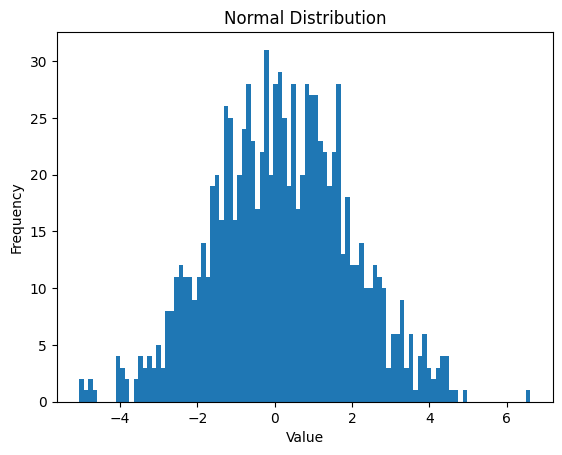

In [13]:

import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(mean, standard_deviation, 1000)


fig, ax = plt.subplots()


ax.hist(data, bins=100)

# Add a title and labels
ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()

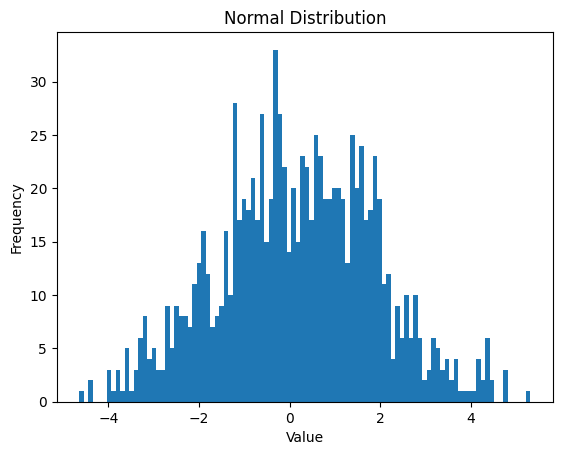

In [14]:
data = np.random.normal(mean, standard_deviation, 1000)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.hist(data, bins=100)

# Add a title and labels
ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()

In [15]:
df.Daily_Return

1       0.114107
3       4.268930
4      -0.222583
5       1.906312
6       1.698174
          ...   
1134   -0.587138
1135    0.250873
1136   -0.589127
1137   -1.085584
1138   -0.281002
Name: Daily_Return, Length: 1120, dtype: float64

Log Transfomation


In [76]:
import numpy as np
from scipy.stats import boxcox
import scipy as sc


In [80]:
import numpy as np
from scipy import stats



# Perform the Yeo-Johnson transformation
transformed_data, lambda_opt = stats.yeojohnson(df.Daily_Return)

# Print the results


In [82]:
df['TransformedData'], lambda_opt = stats.yeojohnson(df['Daily_Return'])
df

,Date,Daily_Return,TransformedData
1,2019-01-02,0.114107,0.114445
3,2019-01-04,4.268930,4.518547
4,2019-01-07,-0.222583,-0.221344
5,2019-01-08,1.906312,1.971906
6,2019-01-09,1.698174,1.751909
...,...,...,...
1134,2023-07-05,-0.587138,-0.579351
1135,2023-07-06,0.250873,0.252446
1136,2023-07-07,-0.589127,-0.581292
1137,2023-07-10,-1.085584,-1.061851


In [87]:
mean1 = df.TransformedData.mean()

# Get the mode of each column
mode1 = df.TransformedData.mode()

# Get the median of each column
median1 = df.TransformedData.median()

standard_deviation1 = df.TransformedData.std()

print(mean1)

print(median1)
print(standard_deviation1)

0.19470435251700546
0.1248075899073521
1.796724714995923


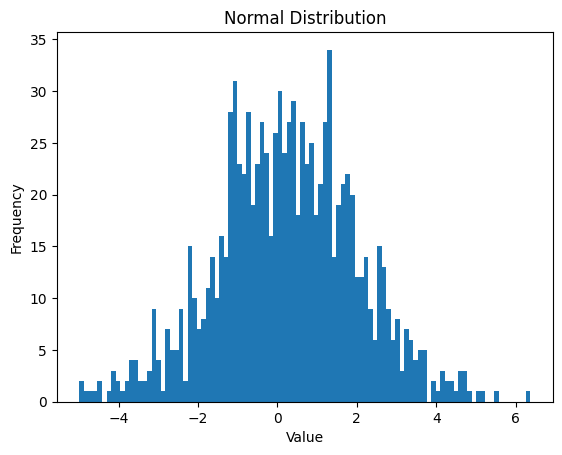

In [85]:

data = np.random.normal(mean1, standard_deviation1, 1000)


fig, ax = plt.subplots()


ax.hist(data, bins=100)

# Add a title and labels
ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()

In [89]:
from scipy.stats import shapiro

transformed_data = np.reciprocal(df.Daily_Return)

# Print the transformed data
print("Transformed Data:", transformed_data)




Transformed Data: 1       8.763690
3       0.234251
4      -4.492702
5       0.524573
6       0.588868
          ...   
1134   -1.703179
1135    3.986077
1136   -1.697426
1137   -0.921163
1138   -3.558687
Name: Daily_Return, Length: 1120, dtype: float64


c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [94]:
shift = 0.0001
df['TTTransformedData'] = np.reciprocal(df['Daily_Return'] + shift)
df

,Date,Daily_Return,TransformedData,TTTransformedData
1,2019-01-02,0.114107,0.114445,8.756017
3,2019-01-04,4.268930,4.518547,0.234245
4,2019-01-07,-0.222583,-0.221344,-4.494722
5,2019-01-08,1.906312,1.971906,0.524546
6,2019-01-09,1.698174,1.751909,0.588833
...,...,...,...,...
1134,2023-07-05,-0.587138,-0.579351,-1.703469
1135,2023-07-06,0.250873,0.252446,3.984489
1136,2023-07-07,-0.589127,-0.581292,-1.697714
1137,2023-07-10,-1.085584,-1.061851,-0.921248


In [95]:
mean2 = df.TTTransformedData.mean()

# Get the mode of each column
mode2 = df.TTTransformedData.mode()

# Get the median of each column
median2 = df.TTTransformedData.median()

standard_deviation2 = df.TTTransformedData.std()

print(mean2)

print(median2)
print(standard_deviation2)

27.196109518744255
0.29404309957889097
517.2344138881576


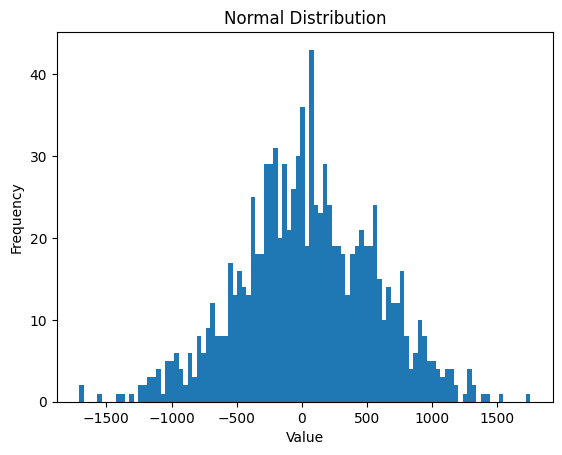

In [96]:
data = np.random.normal(mean2, standard_deviation2, 1000)


fig, ax = plt.subplots()


ax.hist(data, bins=100)

# Add a title and labels
ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()